# 2장. 서울시 범죄 현황 분석
## 2-5 Pandas의 pivot_table 활용하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("data/02. sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [3]:
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [4]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [5]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [6]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [7]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [8]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [9]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [10]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [11]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

## 2-7 Seaborn 패키지

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

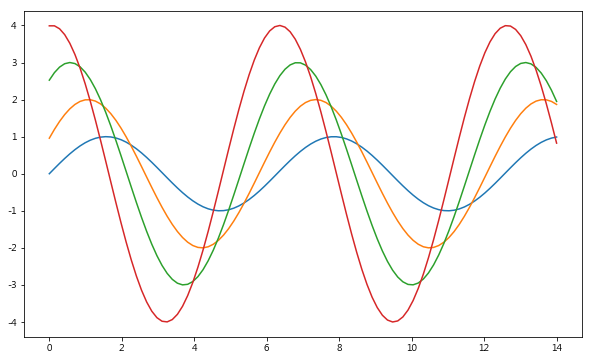

In [14]:
import seaborn as sns

x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

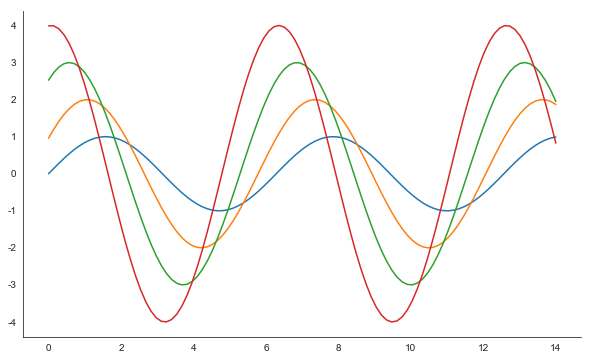

In [15]:
sns.set_style("white")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine()

plt.show()

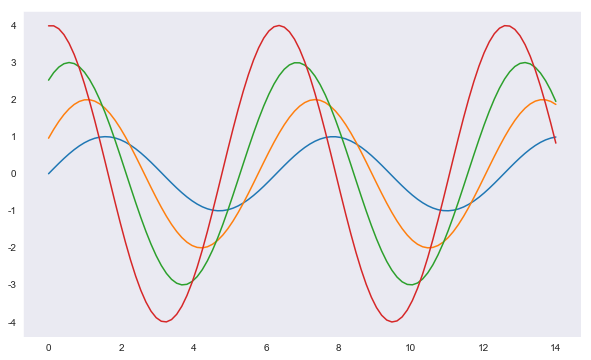

In [16]:
sns.set_style("dark")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

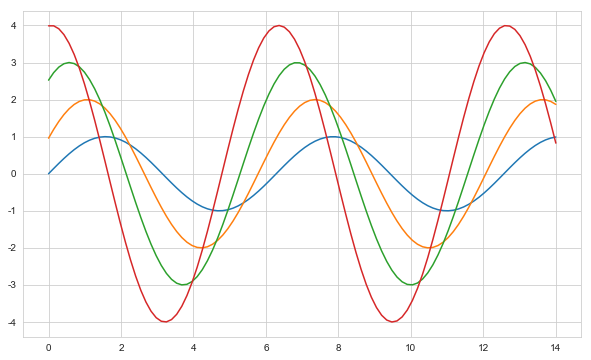

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

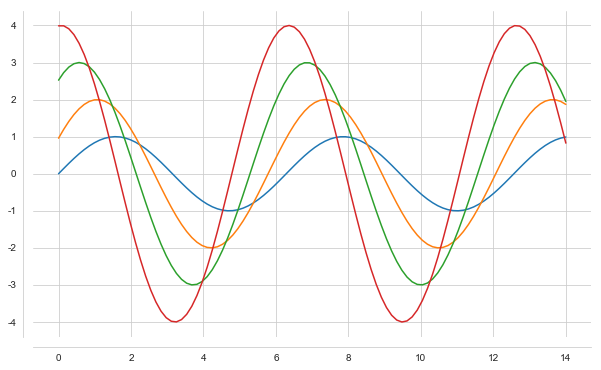

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine(offset=10)

plt.show()

In [19]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


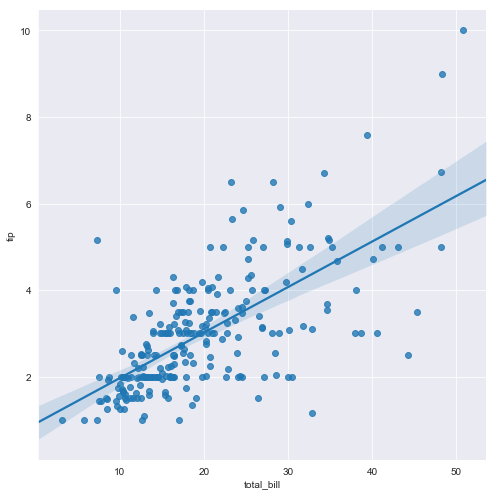

In [21]:
# 산점도 + 선형회귀식
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7)
plt.show()

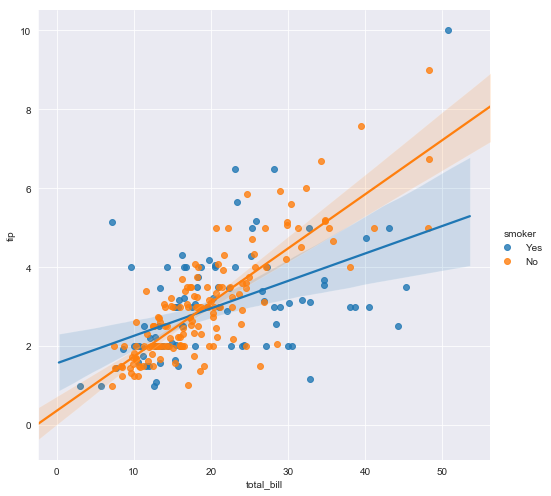

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, height=7)
plt.show()

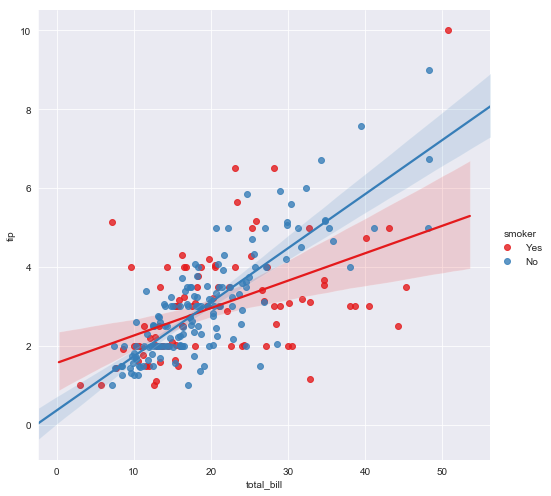

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", height=7)
plt.show()

In [24]:
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.01720855, 0.13206788, 0.69172305, 0.29770088, 0.58781491,
        0.28154946, 0.52427734, 0.1846114 , 0.77370125, 0.43141725,
        0.00160476, 0.37635547],
       [0.15777994, 0.7629993 , 0.67794149, 0.99944232, 0.10426637,
        0.25964834, 0.42076179, 0.20668539, 0.17834175, 0.87711728,
        0.33560944, 0.39525911],
       [0.03463042, 0.43223216, 0.30295495, 0.66616291, 0.3610212 ,
        0.07859299, 0.43592876, 0.41527924, 0.04479679, 0.97128335,
        0.20645111, 0.66125874],
       [0.35082898, 0.80064652, 0.24908405, 0.7004274 , 0.56701259,
        0.35414887, 0.33571153, 0.2657089 , 0.83761113, 0.28839193,
        0.32926691, 0.72076349],
       [0.70383007, 0.74699491, 0.15988333, 0.22477504, 0.80800954,
        0.04799825, 0.89844666, 0.06985309, 0.8271913 , 0.75120231,
        0.35087356, 0.96803499],
       [0.17155448, 0.1377706 , 0.79592124, 0.72062601, 0.12769675,
        0.9475119 , 0.56883137, 0.46928377, 0.93024301, 0.00271603,
        0.57457246,

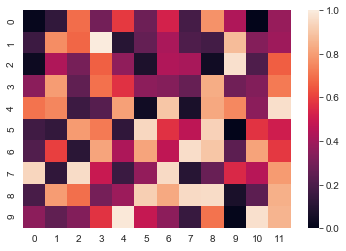

In [25]:
sns.heatmap(uniform_data)
plt.show()

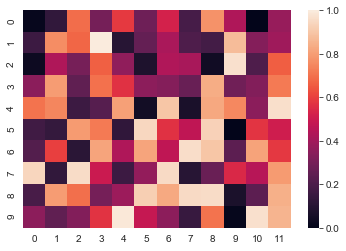

In [26]:
sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

In [27]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


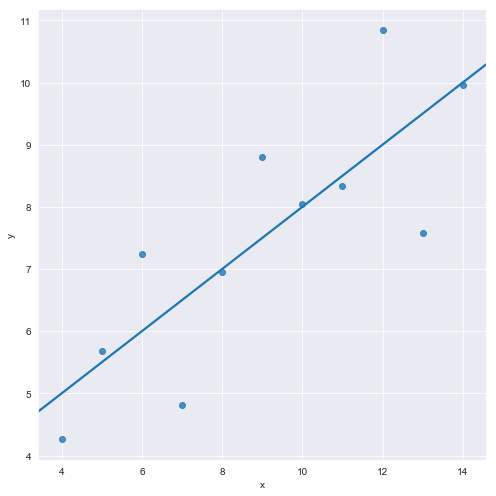

In [28]:
sns.set_style("darkgrid")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, height=7)
plt.show()

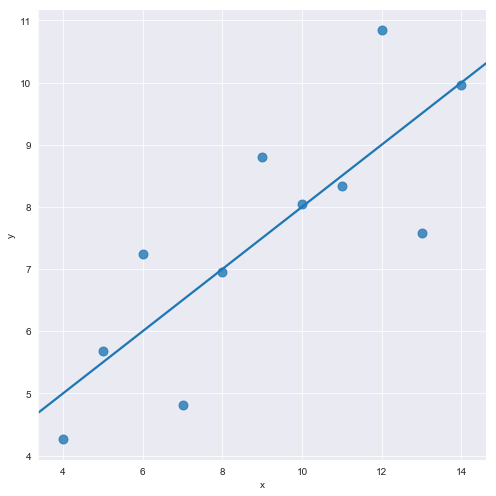

In [29]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

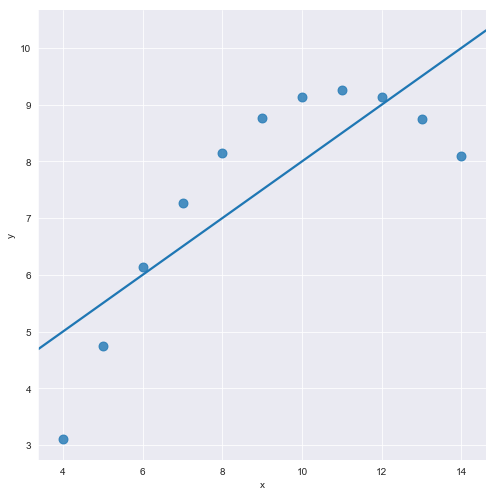

In [30]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=1, ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

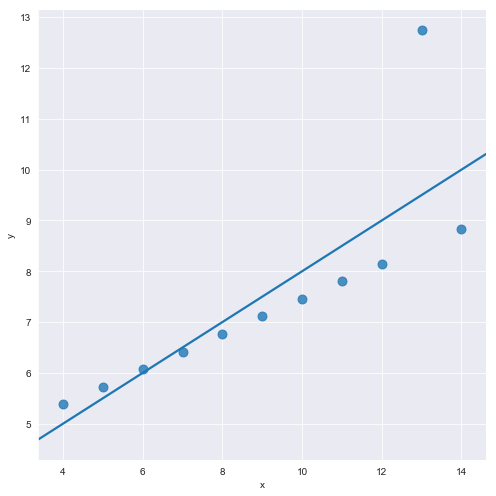

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

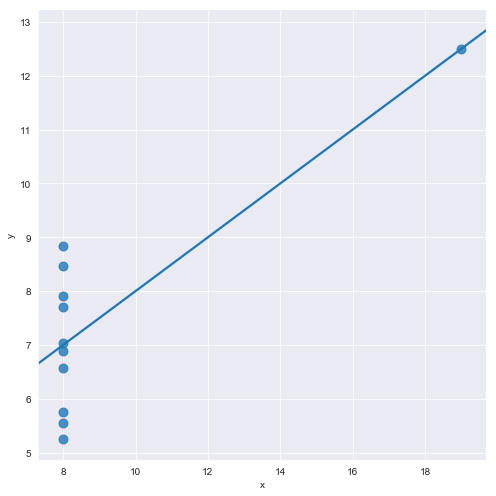

In [32]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),
           ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

## 2-9 지도 시각화 도구: Folium

In [33]:
import folium

In [34]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [35]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen

In [36]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                    zoom_start=13)
stamen

In [37]:
stamen = folium.Map(location=[45.5236, -122.6750], 
                    tiles='Stamen Terrain', zoom_start=13)
stamen

In [38]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [39]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

In [40]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront' ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, 
                    popup='Laurelhurst Park', color='#3186cc', 
                    fill_color='#3186cc', ).add_to(map_2)
map_2

In [41]:
map_5 = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
folium.RegularPolygonMarker([45.5012, -122.6655], 
                            popup='Ross Island Bridge', fill_color='#132b5e', 
                            number_of_sides=3, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5132, -122.6708], 
                            popup='Hawthorne Bridge', fill_color='#45647d', 
                            number_of_sides=4, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5275, -122.6692], 
                            popup='Steel Bridge', fill_color='#769d96', 
                            number_of_sides=6, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5318, -122.6745], 
                            popup='Broadway Bridge', fill_color='#769d96', 
                            number_of_sides=8, radius=10).add_to(map_5)
map_5

In [42]:
state_unemployment = 'data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [43]:
state_geo = 'data/02. folium_us-states.json'

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
             columns=['State', 'Unemployment'],
             key_on='feature.id',
             fill_color='YlGn',
             legend_name='Unemployment Rate (%)')

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [44]:
map